<center><h2>Google PageRank</h2></center>

<center><h5> Homework 2 </h5></center>


#### Libraries & Configurations

In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import scipy.linalg as la
from sympy import symbols, Matrix

# Setting the style for plots
plt.style.use('ggplot')

# Setting the default size for plots
plt.rcParams['figure.figsize'] = [6, 4]

NetworkX is a python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

We will use it to work on the graphs for better understanding

**Preparatory Steps:**

In this section, we will define some useful function that are helpful for the upcoming work, during this work, if some additional repititive task can be formulated as a function, it will be added here.

For example, we will define a function that draws a directed graph (NetworkX) and in addition we will implement as well a function that converts any NetowrkX to a matrix computed according to the equation 2.1 and viceversa.

In [2]:
# function for dealing with directed graphs
# Takes as input a directed graph, a position dictionary, and optional arguments
def draw_directed_edges(G, pos, alpha=1.0, edge_color='k'):
    fig, ax = plt.subplots()
    for edge in G.edges():
        # Check if there's a mutual edge
        if G.has_edge(edge[1], edge[0]):
            # Draw a curved arrow for mutual edges
            offset = 0.1
            style = f"arc3,rad={offset}"
        else:
            # Draw a straight arrow if no mutual edge
            style = "arc3,rad=0"

        # Draw the edge
        edge_pos = (pos[edge[0]], pos[edge[1]])
        ax.annotate("",
                    xy=edge_pos[1], xycoords='data',
                    xytext=edge_pos[0], textcoords='data',
                    arrowprops=dict(arrowstyle="->", color=edge_color,
                                    shrinkA=10, shrinkB=10,
                                    patchA=None, patchB=None,
                                    connectionstyle=style,
                                    alpha=alpha))
    
    nx.draw_networkx_nodes(G, pos, ax=ax)
    nx.draw_networkx_labels(G, pos, ax=ax)
    return ax

# Converts a directed graph to a matrix representation of the pagerank values
def graph_to_matrix(DG):
    # Initialize an empty matrix
    A = np.zeros((len(DG), len(DG)))

    # Iterate over nodes to fill the matrix
    for node in DG.nodes:
        out_links = DG.out_edges(node)
        out_degree = DG.out_degree(node)

        if out_degree > 0:
            # Distribute the 'vote' of the node across its out links
            for _, dest_node in out_links:
                A[dest_node - 1, node - 1] = 1 / out_degree

    return A

def matrix_to_graph(A):
    # Create an empty directed graph
    DG = nx.DiGraph()

    # Add nodes
    num_nodes = A.shape[0]
    DG.add_nodes_from(range(1, num_nodes + 1))

    # Add edges based on non-zero entries in the matrix
    for i in range(num_nodes):
        for j in range(num_nodes):
            if A[i, j] != 0:
                # Add an edge from node j+1 to node i+1
                DG.add_edge(j + 1, i + 1)

    return DG

# Computes the pagerank values for a given matrix (get the eigenvector of eigenvalue 1)
def page_rank(A):
    eigvals, eigvecs = la.eig(A)
    eigvect1 = eigvecs[:, np.argmax(np.isclose(eigvals, 1))]
    scores = eigvect1.real / np.sum(eigvect1)

    return scores.real


### Exercise 1

**Q**: Suppose the people who own page 3 in the web of Figure 1 are infuriated by the fact that its importance score, computed using formula (2.1), is lower than the score of page 1. In an attempt to boost page 3’s score, they create a page 5 that links to page 3; page 3 also links to page 5. Does this boost page 3’s score above that of page 1?

Text(0.5, 1.0, 'Figure 1')

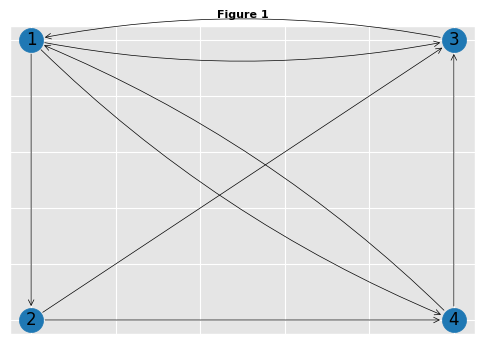

In [3]:
# the graph of original figure, a directed graph
DG1 = nx.DiGraph()
DG1.add_nodes_from([1, 2, 3, 4])
DG1.add_edges_from([(1, 2), (1, 3), (3,1), (1,4), (4,1), (2,4), (4,3), (2,3)])

pos = {1: (0, 1), 2: (0, 0), 3: (1, 1), 4: (1, 0)}
    
ax = draw_directed_edges(DG1, pos)
ax.set_title("Figure 1", fontsize=8, position=(0.5, 0.0), fontweight='bold')

First, we compute the pageRank scores for the original graph (link matrix A):

In [4]:
A = graph_to_matrix(DG1)
print(f"PageRank scores (link matrix) Matrix A:\n{A}")

PageRank scores (link matrix) Matrix A:
[[0.         0.         1.         0.5       ]
 [0.33333333 0.         0.         0.        ]
 [0.33333333 0.5        0.         0.5       ]
 [0.33333333 0.5        0.         0.        ]]


In [5]:
scores = page_rank(A)
for i in range(4):
    print(f"Score of x_{i+1} is {scores[i]}")

Score of x_1 is 0.3870967741935484
Score of x_2 is 0.12903225806451618
Score of x_3 is 0.29032258064516114
Score of x_4 is 0.1935483870967743


We denote with $A_{new}$ the matrix of importance scores after adding the page 5

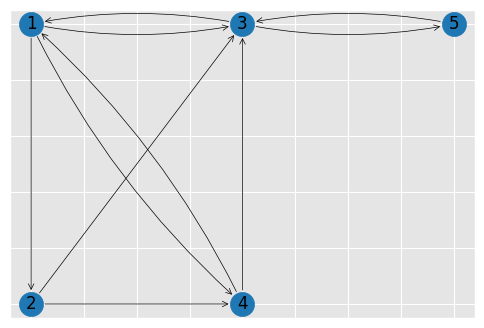

In [6]:
# Same graph as Figure 1, we then add page 5
DG2 = nx.DiGraph()
DG2.add_nodes_from(DG1.nodes())
DG2.add_edges_from(DG1.edges())

# add page 5
DG2.add_node(5)
DG2.add_edges_from([(5, 3), (3, 5)])

# draw the graph
pos[5] = (2, 1)
ax = draw_directed_edges(DG2, pos)


In [7]:
# compute the matrix A_new
A_new = graph_to_matrix(DG2)
A_new

array([[0.        , 0.        , 0.5       , 0.5       , 0.        ],
       [0.33333333, 0.        , 0.        , 0.        , 0.        ],
       [0.33333333, 0.5       , 0.        , 0.5       , 1.        ],
       [0.33333333, 0.5       , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.5       , 0.        , 0.        ]])

In [8]:
# compute the pagerank scores
scores = page_rank(A_new)
for i in range(5):
    print(f"Score of x_{i+1} is {scores[i]}")
    
print(f"Sum of scores: {round(np.sum(scores),2)}")

Score of x_1 is 0.24489795918367346
Score of x_2 is 0.08163265306122452
Score of x_3 is 0.3673469387755102
Score of x_4 is 0.12244897959183676
Score of x_5 is 0.1836734693877551
Sum of scores: 1.0


From these scores, we can see that Page 3's score has indeed increased, and it now has a higher score than Page 1. The strategy of adding Page 5 and creating a mutual link between Pages 3 and 5 effectively boosted Page 3's importance score in the PageRank algorithm.


______

### Exercise 2

**Q**: Construct a web consisting of three or more subwebs and verify that $dim(V_{1}(A))$ equals (or exceeds) the number of the components in the web.

**ANSWER**

*Subwebs:* A subweb is a subset of a web where the pages within a subweb link to each other but not to pages outside the subweb. In other words, a web can be considered as composed of multiple disconnected subwebs.

*Eigenspace:* The eigenspace $V_{1}(A)$ is associated with the eigenvalue 1 of the link matrix A. The dimension of this eigenspace, $dim(V_{1}(A))$​, represents the number of linearly independent eigenvectors corresponding to the eigenvalue 1.

<Axes: >

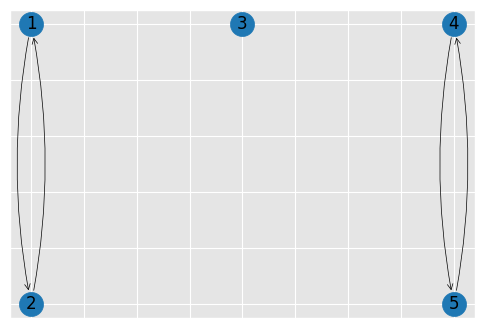

In [9]:
# Construct a web with three subwebs
# Subweb 1: Pages 1 and 2 link to each other
# Subweb 2: Page 3 is a standalone page (links to itself)
# Subweb 3: Pages 4 and 5 link to each other
A_subwebs = np.array([[0, 1, 0, 0, 0],
                      [1, 0, 0, 0, 0],
                      [0, 0, 1, 0, 0],
                      [0, 0, 0, 0, 1],
                      [0, 0, 0, 1, 0]])

pos = {1: (0, 1), 2: (0, 0), 3: (1, 1), 4: (2, 1), 5: (2, 0)}
draw_directed_edges(matrix_to_graph(A_subwebs), pos)

In [10]:
eigenvalues, eigenvectors = la.eig(A_subwebs)

# Count the number of eigenvalues that are approximately 1
num_eigenvalues_1 = np.sum(np.isclose(eigenvalues, 1))

num_eigenvalues_1, eigenvalues

(3, array([ 1.+0.j, -1.+0.j,  1.+0.j, -1.+0.j,  1.+0.j]))

The calculation reveals that there are three eigenvalues that are approximately equal to 1 (within a small tolerance). These eigenvalues correspond to the link matrix $A_{subwebs}$ of the web consisting of three subwebs.

This result verifies the statement in Exercise 2: the dimension of the eigenspace $V_{1}(A)$ (i.e., the number of eigenvalues approximately equal to 1) is equal to the number of disconnected components (subwebs) in the web, which in this case is 3.

Each of these eigenvalues represents an independent 'direction' in which the PageRank scores can be distributed within each subweb. Since the subwebs are disconnected, each subweb contributes a separate eigenvector corresponding to the eigenvalue 1, thus increasing the dimension of $V_{1}(A)$​ by one for each subweb.

______

### Exercise 3

**Q**: Add a link from page 5 to page 1 in the web of Figure 2. The resulting web, considered as an undirected graph, is connected. What is the dimension of $V_{1}(A)$?


Text(0.5, 1.0, 'Figure 2')

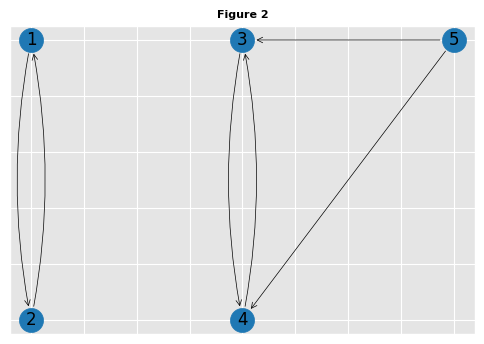

In [11]:
import networkx as nx
# the graph of original figure, an directed graph
DG3 = nx.DiGraph()
DG3.add_nodes_from([1, 2, 3, 4, 5])
DG3.add_edges_from([(1, 2),(2,1), (5,3), (5,4), (3,4), (4,3)])

pos = {1: (0, 1), 2: (0, 0), 3: (1, 1), 4: (1, 0), 5: (2, 1)}
    
ax = draw_directed_edges(DG3, pos)
ax.set_title("Figure 2", fontsize=8, position=(0.5, 0.0), fontweight='bold')

In [12]:
# computing link matrix, then dim(v1(A))
A = graph_to_matrix(DG3)

eigenvalues, eigenvectors = la.eig(A)

# Count the number of eigenvalues that are approximately 1
num_eigenvalues_1 = np.sum(np.isclose(eigenvalues, 1))

num_eigenvalues_1, eigenvalues

(2, array([ 1.+0.j, -1.+0.j,  1.+0.j, -1.+0.j,  0.+0.j]))

As we can see that before adding the edge requested by the exercise we have that $dim(V_{1}(A))$ is equal 2.

Let's see how this will change after combining the two subwebs to become a single web of connected components.

*Note*: It is requested to consider the graph as undirected, thus, we have to ensure that the link matrix in this case represents each edge as a bidirected edge.

In [13]:
# Add link from page 5 to 1, and two additional links for each single link to make it undirected
DG3.add_edges_from([(5,1), (1,5), (3,5), (5,3), (4,5), (5,4)])

A_new = graph_to_matrix(DG3)
A_new

array([[0.        , 1.        , 0.        , 0.        , 0.33333333],
       [0.5       , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.5       , 0.33333333],
       [0.        , 0.        , 0.5       , 0.        , 0.33333333],
       [0.5       , 0.        , 0.5       , 0.5       , 0.        ]])

Computing $dim(V_{1}(A))$

In [14]:
eigenvalues, eigenvectors = la.eig(A_new)

# Count the number of eigenvalues that are approximately 1
num_eigenvalues_1 = np.sum(np.isclose(eigenvalues, 1))

num_eigenvalues_1, eigenvalues

(1,
 array([ 1.        +0.j,  0.65405733+0.j, -0.85656833+0.j, -0.29748901+0.j,
        -0.5       +0.j]))

The dimension becomes 1! As expected.

_______

### Exercise 4

**Q**: In the web of Figure 2.1, remove the link from page 3 to page 1. In the resulting web page 3 is now a dangling node. Set up the corresponding substochastic matrix and find its largest positive (Perron) eigenvalue. Find a non-negative Perron eigenvector for this eigenvalue, and scale
the vector so that components sum to one. Does the resulting ranking seem reasonable?


<Axes: >

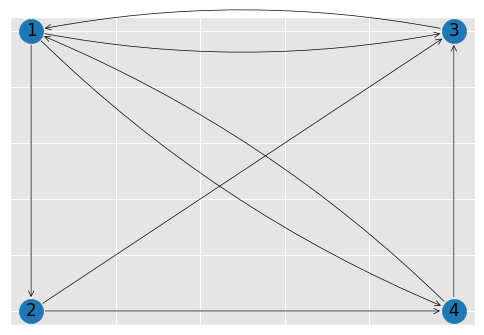

In [15]:
#Before removing the link
draw_directed_edges(DG1, pos)

<Axes: >

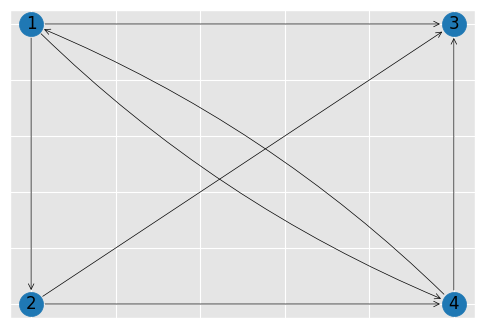

In [16]:
#After removing the link
DG_prime = DG1.copy()
DG_prime.remove_edge(3, 1)
draw_directed_edges(DG_prime, pos)

In [17]:
A_prime = graph_to_matrix(DG_prime)

In [18]:
A_prime

array([[0.        , 0.        , 0.        , 0.5       ],
       [0.33333333, 0.        , 0.        , 0.        ],
       [0.33333333, 0.5       , 0.        , 0.5       ],
       [0.33333333, 0.5       , 0.        , 0.        ]])

In [19]:
# Calculate the eigenvectors and eigenvalues of the modified link matrix
eigenvalues_prime, eigenvectors_prime = la.eig(A_prime)

# Find the largest positive (Perron) eigenvalue
perron_eigenvalue = np.max(np.real(eigenvalues_prime))

# Find the corresponding eigenvector and normalize it
perron_eigenvector = eigenvectors_prime[:, np.argmax(np.real(eigenvalues_prime))]
perron_eigenvector_normalized = np.real(perron_eigenvector) / np.sum(np.real(perron_eigenvector))

perron_eigenvalue, perron_eigenvector_normalized

(0.5613532393351084, array([0.20664504, 0.12270648, 0.43864676, 0.23200172]))

The largest positive (Perron) eigenvalue of the modified link matrix $A^{'}$ is approximately 0.561.
The corresponding normalized non-negative Perron eigenvector is approximately:
$$\begin{bmatrix} 0.206 \\ 0.122 \\ 0.438 \\ 0.232 \end{bmatrix} \;$$

This eigenvector represents the steady-state distribution of PageRank scores for the web, scaled so that the components sum to one. Here's what these values suggest about the ranking of the pages:

- Page 1: Score of 0.2066
- Page 2: Score of 0.1227
- Page 3 (Dangling Node): Score of 0.4386
- Page 4: Score of 0.2320

This ranking indicates that Page 3, despite being a dangling node with no outbound links, has the highest score. This might initially seem counterintuitive since dangling nodes typically don't contribute to other pages' scores. However, the structure of the rest of the web and how the PageRank algorithm distributes importance can lead to such a scenario.

_______

### Exercise 5

**Q**: Prove that in any web the importance score of a page with no backlinks is zero.


To proof that in any web, the importance score of a page is zero if it has no backlinks can be done in the following example:

<Axes: >

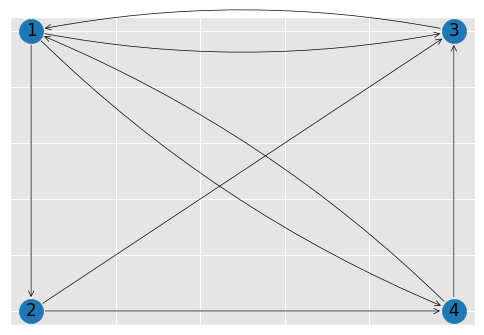

In [20]:
draw_directed_edges(DG1, pos)

Let's modify the page 2 to become a page with no backlinks (i.e. with no input)

<Axes: >

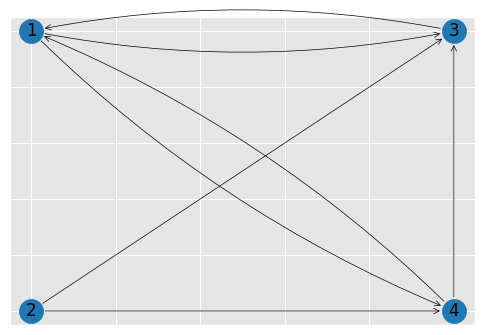

In [21]:
DG5 = DG1.copy()
DG5.remove_edge(1, 2)

draw_directed_edges(DG5, pos)

In [22]:
A5 = graph_to_matrix(DG5)
A5

array([[0. , 0. , 1. , 0.5],
       [0. , 0. , 0. , 0. ],
       [0.5, 0.5, 0. , 0.5],
       [0.5, 0.5, 0. , 0. ]])

Computing the importance score of all nodes

In [23]:
scores = page_rank(A5)
for i in range(4):
    print(f"Score of x_{i+1} is {scores[i]}")

Score of x_1 is 0.4444444444444444
Score of x_2 is -0.0
Score of x_3 is 0.3333333333333333
Score of x_4 is 0.22222222222222218


We can see that the score of $x_{2}$ is 0 and this was expected since the importance score is calculated based of the scores of pages link to it. The more high-importance pages link to a page, the higher its importance score. 
And since the second page doesn't have any backlink to it, its score is zero.

A page with no backlinks means that no other page in the web is linking to it. According to PageRank Algorithm, if no page links to a certain page, then the sum of the link contributions (which form the core of the PageRank calculation) to that page is zero.


_______

### Exercise 6:

**Q**: Implicit in our analysis up to this point is the assertion that the manner in which the pages of a web $W$ are indexed has no effect on the importance score assigned to any given page.
Prove this, as follows: Let $W$ contains $n$ pages, each page assigned an index 1 through $n$, and let $A$ be the resulting link matrix. Suppose we then transpose the indices of pages $i$ and $j$ (so page $i$ is now page $j$ and vice-versa). Let $\tilde{A}$ be the link matrix for the relabelled web.
- Argue that $\tilde{A}=PAP$, where $P$ is the elementary matrix obtained by transposing rows $i$ and $j$ of the $n \times n$ identity matrix. Note that the operation $A → PA$ has the effect of swapping
rows $i$ and $j$ of $A$, while $A → AP$ swaps columns $i$ and $j$. Also, $P^{2} = I$, the identity matrix.
- Suppose that $x$ is an eigenvector of $A$, so $Ax = \lambda x$ for some $\lambda$. Show that $y=Px$ is an eigenvector for $\tilde{A}$ with eigenvalues $\lambda$.
- Explain why this shows that transposing the indices of any two pages leaves the importance scores unchanged, and use this result to argue that any permutation of the page indices leaves the importance scores unchanged.

**ANSWER**

1. Swapping Indices and Link Matrix Transformation:
    - The web $W$ contains $n$ pages, indexed from 1 to $n$, with $A$ as the corresponding link matrix.
    - Suppose indices $i$ and $j$ are transposed, meaning the page previously labeled as $i$ is now labeled as $j$ and vice versa. This results in a new link matrix $\tilde{A}$.
    - The transformation $\tilde{A} = PAP$ is proposed, where $P$ is an elementary matrix obtained by transposing rows $i$ and $j$ of the $n \times n$ identity matrix $I$.
    - The operation $PA$ swaps $i$ and $j$ in $A$, while $AP$ swaps columns $i$ and $j$. Since $P$ is derived from the identity matrix by swapping two rows $P^{2} = I$.

2. Eigenvector Transformation:
    - Let $x$ be an eigenvector of A, so $Ax = \lambda x$ from some eigenvalue $\lambda$.
    - We need to show that $y = Px$ is an eigenvector for $\tilde{A}$ with the same value $\lambda$
    - Since $\tilde{A} = PAP$, we have $\tilde{A}y=PAPy$
    - From there, we have to verify that $\tilde{A}y=\lambda y$, given that $y=Px$:
            $$
            \tilde{A}y=PAPy
            $$
            $$
            = PAP(Px)
            $$
            $$
            = PA(PP)x
            $$
            $$
            = P(Ax)
            $$
            $$
            = P(\lambda x)
            $$
            $$
            = \lambda (Px) 
            $$
            $$
            = \lambda y
            $$
    - Therefore, $y$ is indeed an eigenvector $\tilde{A}$ with the same eigenvalue $\lambda$.
3. Implications for Importance Scores:
    - This result implies that relabeling the indices does not change the eigenvectors, but just their order. The socres, since they are components of the eigenvectors, remain unchanged in magnitude.
    - In addition, any permutation of page indices (not just transposition) will also leave the importance scores unchanged. This is because any permutation can be achieved through a series of transpositions.
    - *Conclusion*: The PageRank algorithm is invariant with respect to page indexing.

_______

### Exercise 7:

**Q**: Prove that if $A$ is an $n \times n$ column-stochastic matrix and $0 \leq m \leq 1$, then $M = (1 − m)A + mS$ is also a column-stochastic matrix.

**ANSWER**

- We will proof first the statment.
- Verify it by a coding example.

To show that M is column-stochastic matrix we have to show that for M:
1. Every entry in M is non-negative.
2. The sum of the entries in each column of M is 1.

- Non-negative Entries:
    - Since $A$ and $S$ are column-stochastic, all their entries are non-negative.
    - Given $0 \leq m \leq 1$, both $(1-m)$ and $m$ are non-negative.
    - The product of non-negative number is non-negative. Therefore, both $(1-m)A$ and $mS$ have non-negative entries.
    - The sum of non-negative numbers is also a non-negative. Hence, every entry in $M= (1-m)A + mS$ is non-negative.
- Column Sums:
    - The sum of the entries in each column of $A$ is 1.
    - The sum of the entries in each column of $S$ is also 1.
    - For any column $j$, the sum of the entries in column $j$ of $(1-m)A$ is $(1-m)$ since scaling a column by $(1-m)$ scales the sum by $(1-m)$.
    - Similarly, the sum of the entries in column $j$ of $mS$ is $m$.
    - Therefore, the sum of the entries in column $j$ of $M$ is $(1-m)+m = 1$.

Finally, we have proven that $M$ is a column-stochastic matrix.

In [24]:
# A function that takes as input a matrix and returns True
# if the matrix is column stochastic and False otherwise
def is_column_stochastic(A, tol=1e-6):
    # Check if all entries are non-negative
    if np.any(A < -tol):
        return False

    # Check if all columns sum to 1
    if np.any(np.abs(np.sum(A, axis=0) - 1) > tol):
        return False

    return True

A = graph_to_matrix(DG1)
print(f"Matrix A:\n{A}")
print(f"Is A column stochastic? {is_column_stochastic(A)}")

Matrix A:
[[0.         0.         1.         0.5       ]
 [0.33333333 0.         0.         0.        ]
 [0.33333333 0.5        0.         0.5       ]
 [0.33333333 0.5        0.         0.        ]]
Is A column stochastic? True


In [25]:
# Define M and verify the statement
S = np.ones((4, 4)) / 4
M = 0.85 * A + 0.15 * S
print(f"Matrix M:\n{M}")
print(f"Is M column stochastic? {is_column_stochastic(M)}")

Matrix M:
[[0.0375     0.0375     0.8875     0.4625    ]
 [0.32083333 0.0375     0.0375     0.0375    ]
 [0.32083333 0.4625     0.0375     0.4625    ]
 [0.32083333 0.4625     0.0375     0.0375    ]]
Is M column stochastic? True


_______

### Exercise 8:

**Q**: Show that the product of two column-stochastic matrices is also column-stochastic.

**ANSWER**

Let's denote by $A$ and $B$ as two matrices which are column-stochastic. We need to show that their product, $C=AB$ is also column-stochastic.

1. Non-negatice Entries:
    - Since both $A$ and $B$ are column-stochastic, all their entries are non-negative.
    - The product of two non-negative number is non-negative.
    - Therefore, all entries of $C=AB$ must be non-negative.
2. Column Sums:
    - The sum of the entries in each column of $A$ and $B$ is 1.
    - Let's consider a column $j$ of $C$. The $i$-th element of this column, denoted by $c_{ij}$ is given by the dot product of the $i$-th row of $A$  and the $j$-th column of $B$:
    $$ c_{ij} = \sum_{k=1}^{n} a_{ik}b_{kj} $$
    - Since each of column of $B$ sums to 1, we can replace $ \sum_{k=1}^{n} b_{kj}$ with 1:
    $$ c_{ij} = \sum_{k=1}^{n} a_{ik} . 1 $$
    - Therefore, the sum of the $i$-th entries of column $j$ in $C$ is:
    $$ \sum_{i=1}^{n} c_{ij} = \sum_{i=1}^{n} \sum_{k=1}^{n} a_{ik} $$
    - Since each column of $A$ sums to 1, this sum becomes 1:
    $$ \sum_{i=1}^{n} c_{ij} = 1 $$

<Axes: >

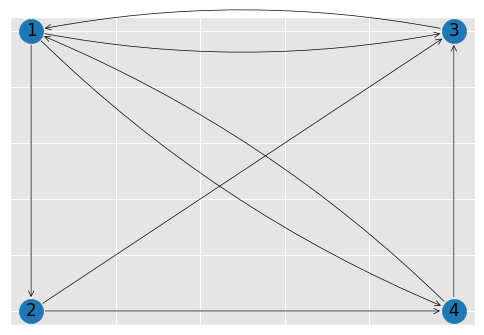

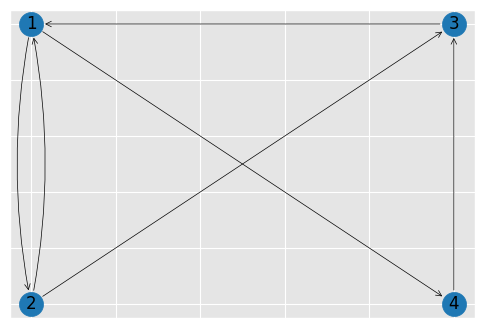

In [26]:
# We prepare out matrices A and B
A = graph_to_matrix(DG1)
DG_temp = DG5.copy()
DG_temp.remove_edge(1, 3)
DG_temp.remove_edge(4, 1)
DG_temp.remove_edge(2, 4)
DG_temp.add_edge(1, 2)
DG_temp.add_edge(2, 1)

#Drawing both graphs
draw_directed_edges(DG1, pos)
draw_directed_edges(DG_temp, pos)

Matrix C:
[[0.25       0.5        0.         1.        ]
 [0.         0.16666667 0.33333333 0.        ]
 [0.5        0.16666667 0.33333333 0.        ]
 [0.25       0.16666667 0.33333333 0.        ]]
Is C column stochastic? True


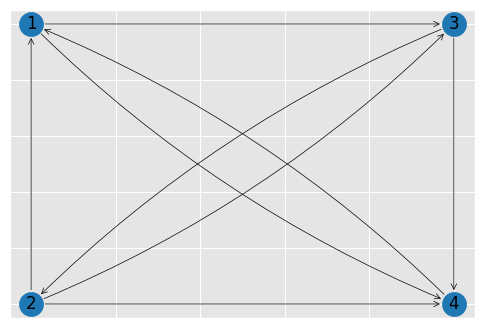

In [27]:
A = graph_to_matrix(DG1)
B = graph_to_matrix(DG_temp)

C = A.dot(B)

#Drawing the graph of C
draw_directed_edges(matrix_to_graph(C), pos)
print(f"Matrix C:\n{C}")
print(f"Is C column stochastic? {is_column_stochastic(C)}")

_______

### Exercise 9:

**Q**: Show that a page with no backlinks is given importance score $m/n$ by formula (3.2).

Recall of formula (3.2): $$ x = (1-m)Ax + ms $$ where $s$ is a column vector of all entries $1/n$

**ANSWER**

Let's consider a page, say Page $i$, which has no backlinks. This means that for the link matrix $A$, the $i$-th column will be all zeros (since no pages link to Page $i$).

1. PageRank Equation of page $i$:
    - The PageRank score of Page $i$, denoted as $x_{i}$, is given by the $i$-th component of the equation:
    $$ x_{i} = (1-m)(Ax)_{i} + ms_{i}$$
    - Since $s_i = 1/n$, the equation becomes:
    $$ x_{i} = (1-m)(Ax)_{i} + \frac{m}{n}$$
    
2. Evaluating $(Ax)_{i}$:
    - $(Ax)_{i}$ is the $i$-th component of the product $Ax$, which is the dot product of the $i$-th row of $A$ and the vector $x$.
    - Since the $i$-th row of $A$ is all zeros (because Page $i$ has no backlinks), $(Ax)_{i} = 0$.
    - Therefore, the equation simplifies to: 
    $$ x_{i} = 0 + m/n = m/n$$

<Axes: >

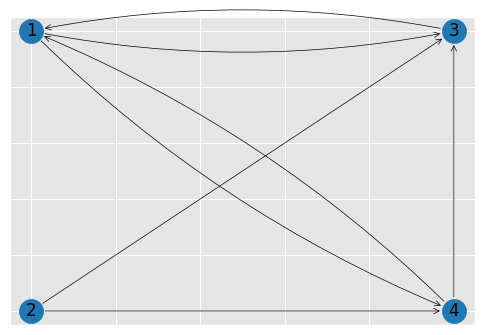

In [28]:
# We have here a graph where the node 2 (indicated as i) as no backlinks
m = 0.15
n = 4
s = np.ones((n, 1)) / n
A5 = graph_to_matrix(DG5)
draw_directed_edges(DG5, pos)

In [29]:
A5

array([[0. , 0. , 1. , 0.5],
       [0. , 0. , 0. , 0. ],
       [0.5, 0.5, 0. , 0.5],
       [0.5, 0.5, 0. , 0. ]])

In [30]:
scores = page_rank(A5)
for i in range(4):
    print(f"Score of x_{i+1} was {scores[i]}")
    
    scores[i] = (1 - m) * scores[i] + m * s[i][0]
    
    print(f"Score of x_{i+1} after applying the formula is: {scores[i]}")

    print()

print(f"Is m/n equal to score of x_2? {np.isclose(m / n, scores[1])}")

Score of x_1 was 0.4444444444444444
Score of x_1 after applying the formula is: 0.41527777777777775

Score of x_2 was -0.0
Score of x_2 after applying the formula is: 0.0375

Score of x_3 was 0.3333333333333333
Score of x_3 after applying the formula is: 0.3208333333333333

Score of x_4 was 0.22222222222222218
Score of x_4 after applying the formula is: 0.22638888888888886

Is m/n equal to score of x_2? True


________

### Exercise 10:

**Q**: Suppose that $A$ is the link matrix for a strongly connected web of $n$ pages
*(any page can be reached from any other page by following a finite number of links)*.

- Show that $dim(V_{1}(A)) = 1$ as follows. Let $(A^{k})_{ij}$ denote the $(i, j)$-entry of $A^{k}$.
- Note that page $i$ can be reached from page $j$ in one step if and only $A_{ij} \gt 0$ (since $A_{ij} \gt 0$ means there's a link from $j$ to $i$!).
- Show that $(A^{2})_{ij} \gt 0$ if and only if page $i$ can be reached
from page $j$ in exactly two steps. 

*Hint: $(A^{2})_{ij} = \sum_{k} A_{ik} A_{kj} $ ; all $A_{ij}$ are non-negative, so $(A^{2})_{ij} \gt 0$ implies that for some $k$ both $A_{ik}$ and $A_{kj}$ are positive.* 

- Show more generally that $(A^{p})_{ij} \gt 0$  if and only if page $i$ can be reached from page $j$ in EXACTLY $p$ steps.

- Argue that $(I + A + A^{2} + \dots + A^{p})_{ij} \gt 0$ if and only if page $i$ can be reached from page $j$ in $p$ or fewer steps (note $p = 0$ is a legitimate choice—any page can be reached from itself
in zero steps!).

- Explain why $I + A + A^{2} + \dots + A^{n-1}$ is a positive matrix if the web is strongly connected.

- Use the last part (and Exercise 8) so show that $B = \frac{1}{n} (I + A + A^{2} + \dots + A^{n−1})$ is positive
and column-stochastic (and hence by Lemma 3.2, $dim(V_{1}(B)) = 1$).

- Show that if $x \in V_{1}(A)$ then $x \in V_{1}(B)$. Why does this imply that $dim(V_{1}(A)) = 1$ ?

_________

**Part 1**: Showing $dim(V_{1}(A)) = 1$

1. Eigenvectors and Eigenvalues of $A$:

- Eigenvectors of a matrix represent directions in which the effect of the matrix (when it acts as a linear transformation) is simply to scale (by the eigenvalue).
- The eigenvector corresponding to the eigenvalue 1 (if it exists) represents a steady state or equilibrium condition where the application of the matrix does not change the vector.

2. Strongly Connected Web:
\
In a strongly connected web, every page is reachable from every other page. This means that the influence of a page (in terms of linking) eventually spreads throughout the entire network.

3. Dimension of $V_{1}(A)$:

- $V_{1}(A)$ represents the eigenspace associated with the eigenvalue 1.
- If $dim(V_{1}(A)) \gt 1$, it would imply multiple independant subwebs, which is not possible in a strongly connected web. The web's connectivity ensures that the importance of any page influences all others, leading to a single unique state.
- Therefore, $dim(V_{1}(A)) = 1$, meaning there is only one independant vector that remains unchanged by the application of $A$.

In [31]:
# Create a representative link matrix A for a strongly connected web
# For simplicity, let's consider a small web of 4 pages where each page links to every other page
A_strongly_connected = np.array([[0, 1/3, 1/3, 1/3],
                                 [1/3, 0, 1/3, 1/3],
                                 [1/3, 1/3, 0, 1/3],
                                 [1/3, 1/3, 1/3, 0]])

# Compute eigenvectors and eigenvalues
eigenvalues, eigenvectors = la.eig(A_strongly_connected)

# Find the number of eigenvectors corresponding to the eigenvalue 1
num_eigenvectors_eigenvalue_1 = np.sum(np.isclose(eigenvalues, 1))

num_eigenvectors_eigenvalue_1, eigenvalues

(1,
 array([-0.33333333+0.j,  1.        +0.j, -0.33333333+0.j, -0.33333333+0.j]))

____

**Part 2**: Show that $(A^{2})_{ij} \gt 0$ if and only if page $i$ can be reached from page $j$ in exactly two steps. 

- The entry of $(A^{2}_{ij})$ is calculated as the sum of the products of corresponding elements from the $i$-th row of $A$ and the $j$-th column of $A$.
- If $(A^{2}_{ij}) \gt 0$ it implies that there is at least one intermediary page $k$ such that there is a link from $j$ to $k$ (indicated by $A_{kj} \gt 0$) and a link from $k$ to $i$ (indicated as $A_{ik} \gt 0$). This forms a path of exactly two steps from $j$ to $i$.

In [32]:
# Create a simple link matrix A for a small web
# Assume a web of 4 pages with some direct links
A_simple = np.array([[0, 1, 0, 0],  # Page 1 has a link from Page 2
                     [0, 0, 1, 0],  # Page 2 has a link from Page 3
                     [1, 0, 0, 1],  # Page 3 has links from Pages 1 and 4
                     [0, 0, 0, 0]]) # Page 4 has no incoming links

# Calculate A^2 and show it later after interpreting the results
A_squared = np.dot(A_simple, A_simple)

<Axes: >

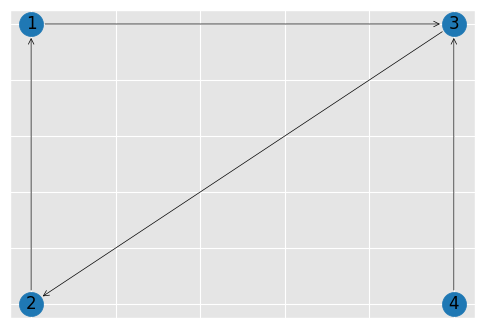

In [33]:
# original graph of A
draw_directed_edges(matrix_to_graph(A_simple), pos)

Page 1 can be reached from page 3 in two steps: (3 -> 2 -> 1). So $(A^{2})_{13} = 1$. 

Page 2 can be reached from page 4 and from page 1 in two steps, (1 -> 3 -> 2) and (4 -> 3 -> 2) respectively. Thus, $(A^{2})_{24} = (A^{2})_{21} = 1$ 

Page 3 can be reached from page 2 in two steps, (2 -> 1 -> 3) so $(A^{2})_{32} = 1$. 

In [34]:
A_squared

array([[0, 0, 1, 0],
       [1, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 0, 0, 0]])

____

**Part 3**: Show more generally that $(A^{p})_{ij} \gt 0$  if and only if page $i$ can be reached from page $j$ in EXACTLY $p$ steps.

- The entry $(A^{p})_{ij}$ in the matrix $A^{p}$ represents paths from page $j$ to page $i$ in exactly $p$ steps.
- Each element of $(A^{p})_{ij}$ is the sum of products of sequences of $p$ elements, each drawn from a row of $A$ corresponding to an intermediate or start/end page, forming a chain from $j$ to $i$ over $p$ steps.

- If $(A^{p})_{ij} \gt 0$, it implies there is at least one sequence of $p$ links leading from page $j$ to page $i$.
- This is because the positive value is a result of summing positive products, each representing a valid path of length $p$.

- For $(A^{p})_{ij}$ to be positive, there must be at least one sequence of links (or a path) where each consecutive links exists in the web. The existence of such a path confirm that page $i$ can be reached from page $j$ in $p$ steps.

We can verify our proof by working again of $A_{simple}$ provided above.

<Axes: >

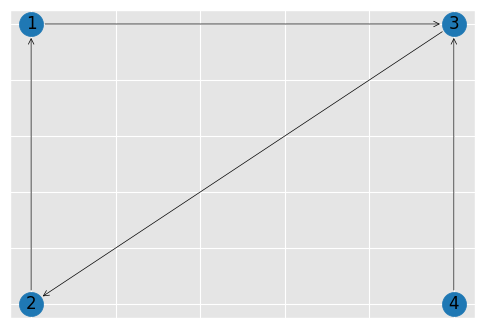

In [35]:
# Recall of A_simple
draw_directed_edges(matrix_to_graph(A_simple), pos)

We can visit page 1 from page 4 in 3 steps.
In addition, we can go from 1 and coming back to it in 3 steps, so we will have 1 on the diagonal, similarly for pages 2 and 3 (cycle).

In [36]:
A3 = np.dot(A_squared, A_simple)
A3

array([[1, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 0]])

_____

**Part 4**: Argue that $(I + A + A^{2} + \dots + A^{p})_{ij} \gt 0$ if and only if page $i$ can be reached from page $j$ in $p$ or fewer steps (note $p = 0$ is a legitimate choice—any page can be reached from itself
in zero steps!).

1. Matrix $I$: \
The identity matrix $I$ represents zero-step connections. The diagonal entries of $I$ are 1, indicating that every page can reach itself in zero steps.

2. Powers of $A$: \
Each power of A, $A^{k}$ (for $1 \leq k \leq p$), respresents paths of exactly $k$ steps in the web. An entry $(A^{k})_{ij} \gt 0$ signifies that page $i$ can be reached from page $j$ in $k$ steps.

3. The Summation: 
- This summation incorporates paths of all lengths from 0 to $p$ steps.
- The entry $(I + A + A^{2} + \dots + A^{p})_{ij}$ is a sum of elements each representng paths of different length from $j$ to $i$. It includes direct paths (1 step), paths of 2 steps, and so on, up to p steps, we well as the zero-step self-connection.
- $(I + A + A^{2} + \dots + A^{p})_{ij} \gt 0$, it means that there exists at least one path from $j$ to $i$ in **$p$ or fewer steps**. This is because the summation includes all possible paths of length up to $p$, and a positive sum means at least one of these paths exists.

In [37]:
Summation = np.identity(4) + A_simple + A_squared + A3
Summation

array([[2., 1., 1., 1.],
       [1., 2., 1., 1.],
       [1., 1., 2., 1.],
       [0., 0., 0., 1.]])

- We have the value 2 in the entry (1,1), that is 1+1, 1 for the self-loop and one because we can reach page 1 from page 1 in 3 steps (as discussed above).

<Axes: >

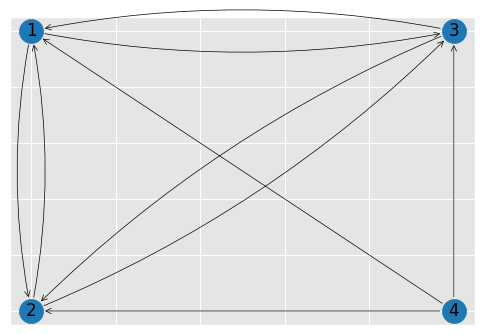

In [38]:
draw_directed_edges(matrix_to_graph(Summation), pos)

In this graph, **any directed edge** from $i$ to $j$ means that we have a path from $i$ to $j$ in $p$ steps or fewer. (Here $p$ is 3)
_____

**Part 5:** Explain why $I + A + A^{2} + \dots + A^{n-1}$ is a positive matrix if the web is strongly connected.

1. Strongly Connected Web:
A web is said to be strongly connected if every page can be reached from every other page by following a series of links. In such a web, for any two pages 
$i$ and $j$, there exists a path of a finite number of steps from 
$j$ to $i$.

2. Understanding $I + A + A^{2} + \dots + A^{n-1}$:
- This matrix sums up the connections of all lengths from 0 to $n-1$ steps within the web.
- The identity matrix $I$ accounts for zero-step paths (a page reaching itself).

3. Positivity of Summation:
- In a strongly connected web, for any two pages $i$ and $j$, there is a path from $j$ to $i$ within $n−1$ steps or fewer.
- Therefore, for every pair of pages $i$ and $j$, at least one of the matrices $I, A, A^{2}, \dots, A^{n-1}$ will have a positive entry in the $(i,j)$-position, indicating a path of a certain length.
- When these matrices are summed, the summation $I + A + A^{2} + \dots + A^{n-1}$ will have positive entries for every $(i,j)$, as each pair of pages is connected by some path of length $n-1$ or less.

____

**Part 6**: Use the last part (and Exercise 8) so show that $B = \frac{1}{n} (I + A + A^{2} + \dots + A^{n−1})$ is positive
and column-stochastic (and hence by Lemma 3.2, $dim(V_{1}(B)) = 1$).

1. Positivity of $B$:
- From Part 5, we know that $I + A + A^{2} + \dots + A^{n−1}$ is a positive matrix in a strongly connected web, meaning all its entries are positive.
- Scaling a positive matrix by a positive scalar $1/n$ maintains the positivity of all entries.
- Thus, $B$ is a positive matrix.

2. Column-Stochastic Nature of $B$:
- Each matrix in the summation is column-stochastic.
- From exercise 8, we know that the product (and by extension, the sum) of column-stochastic matrices is also a column-stochastic.
- Therefore, the sum $I + A + A^{2} + \dots + A^{n−1}$ is column-stochastic
- Scaling the sum by $1/n$ maintains the property that each column sums to 1.
- Hence, $B$ is column-stochastic

3. Dimension of $V_{1}(B)$:
- If a matrix is positive and column-stochastic, then the dimension of the eigenspace associated with the eigenvalue 1, $V_{1}(B)$ is 1.
- Since $B$ is both positive and column-stochastic, then $dim(V_{1}(B))=1$.

In [39]:
B = Summation / 4
print(f"Matrix B:\n{B}")
print(f"Is B column stochastic? {is_column_stochastic(B)}")

Matrix B:
[[0.5  0.25 0.25 0.25]
 [0.25 0.5  0.25 0.25]
 [0.25 0.25 0.5  0.25]
 [0.   0.   0.   0.25]]
Is B column stochastic? True


In [40]:
eigenvalues, eigenvectors = la.eig(B)
# Find the number of eigenvectors corresponding to the eigenvalue 1
num_eigenvectors_eigenvalue_1 = np.sum(np.isclose(eigenvalues, 1))

num_eigenvectors_eigenvalue_1

1

________

**Part 7**: Show that if $x \in V_{1}(A)$ then $x \in V_{1}(B)$. Why does this imply that $dim(V_{1}(A)) = 1$ ?




1. Eigenvectors in $V_{1}(A)$:
- If x is an eigenvector in $V_{1}(A)$, it means that $Ax=x$, where $x$ is scaled by the eigenvalue 1 by the action of $A$. This represents a steady-state distribution of PageRank scores.
2. Eigenvectors in $V_{1}(B)$:
- To show that $x \in V_{1}(A)$ implies $x \in V_{1}(B)$, we need to demonstrate that $Bx = x$ as well.
- Recall that $B = \frac{1}{n} (I + A + A^{2} + \dots + A^{n−1})$
- Since $Ax = x$, it follows that $A^{k}x = x$ for any positive integer $k$, due to the repeated application of $A$.
- Therefore, $(I + A + A^{2} + \dots + A^{n-1})x = nx$, because each term in the summation contributes x.
- Applying $B$ to $x$ gives $Bx = \frac{1}{n} (I + A + A^{2} + \dots + A^{n−1})x = \frac{1}{n}nx = x$.
- This shows that $x$ is also an eigenvector of $B$ corresponsing to the eigenvalue 1, hence $x \in V_{1}(B)$.

In [41]:
A_simple = np.array([[0, 1, 0, 0],  
                     [0, 0, 1, 0],  
                     [1, 0, 0, 1], 
                     [0, 0, 0, 0]])

In [42]:
# Compute eigenvectors and eigenvalues of A
eigenvalues_A, eigenvectors_A = la.eig(A_simple)

# Identify an eigenvector x corresponding to the eigenvalue 1 of A
eigenvector_x = eigenvectors_A[:, np.argmax(np.isclose(eigenvalues_A, 1))]

# Normalize eigenvector_x for consistency
eigenvector_x_normalized = eigenvector_x / np.sum(eigenvector_x)

# Construct the matrix B
B = np.linalg.matrix_power(A_simple, 1) + np.identity(4)
for p in range(2, A_simple.shape[0]):
    B += np.linalg.matrix_power(A_simple, p)
B = B / A_strongly_connected.shape[0]

# Verify that Bx = x
Bx = np.dot(B, eigenvector_x_normalized)

# Compare Bx and x to confirm if they are the same (up to a tolerance)
is_eigenvector_of_B = np.isclose(Bx, eigenvector_x_normalized)

print(f"Bx:\n{Bx}")

print(f"Eigenvector x:\n{eigenvector_x_normalized}")

print(f"Is Bx equal to x? {is_eigenvector_of_B.all()}")

Bx:
[0.33333333+0.j 0.33333333+0.j 0.33333333+0.j 0.        +0.j]
Eigenvector x:
[ 0.33333333-0.j  0.33333333-0.j  0.33333333-0.j -0.        -0.j]
Is Bx equal to x? True


In [43]:
# dimension of eigenspace of eigenvalue 1
num_eigenvectors_eigenvalue_1_a = np.sum(np.isclose(eigenvalues_A, 1))
num_eigenvectors_eigenvalue_1_b = np.sum(np.isclose(la.eig(B)[0], 1))

num_eigenvectors_eigenvalue_1_a, num_eigenvectors_eigenvalue_1_b

(1, 1)

______

### Exercise 11:

**Q**: Consider again the web in Figure 2.1, with the addition of a page 5 that links to page 3, where page 3 also links to page 5. Calculate the new ranking by finding the eigenvector of M (corresponding to $\lambda$ = 1) that has positive components summing to one. Use $m = 0.15$.

<Axes: >

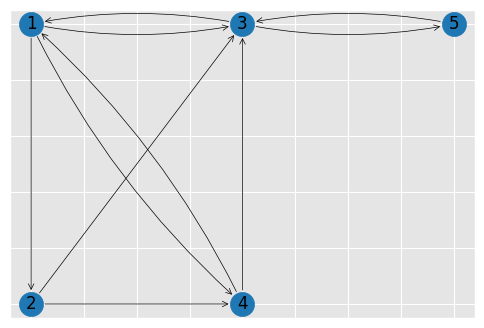

In [44]:
DG11 = DG1.copy()
DG11.add_node(5)
DG11.add_edges_from([(5, 3), (3, 5)])
draw_directed_edges(DG11, pos)

In [45]:
A = graph_to_matrix(DG11)
A

array([[0.        , 0.        , 0.5       , 0.5       , 0.        ],
       [0.33333333, 0.        , 0.        , 0.        , 0.        ],
       [0.33333333, 0.5       , 0.        , 0.5       , 1.        ],
       [0.33333333, 0.5       , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.5       , 0.        , 0.        ]])

In [46]:
m = 0.15
S = np.ones((5, 5)) / 5
M11 = (1-m) * A + m * S
M11

array([[0.03      , 0.03      , 0.455     , 0.455     , 0.03      ],
       [0.31333333, 0.03      , 0.03      , 0.03      , 0.03      ],
       [0.31333333, 0.455     , 0.03      , 0.455     , 0.88      ],
       [0.31333333, 0.455     , 0.03      , 0.03      , 0.03      ],
       [0.03      , 0.03      , 0.455     , 0.03      , 0.03      ]])

In [47]:
# Compute eigenvectors and eigenvalues of M11
eigenvalues_M, eigenvectors_M = la.eig(M11)

# Identify an eigenvector x corresponding to the eigenvalue 1 of M
eigenvector_x = eigenvectors_M[:, np.argmax(np.isclose(eigenvalues_M, 1))]

scores = eigenvector_x / np.sum(eigenvector_x)
for i in range(5):
    print(f"Score of x_{i+1} is {round(scores[i].real,3)}")

Score of x_1 is 0.237
Score of x_2 is 0.097
Score of x_3 is 0.349
Score of x_4 is 0.138
Score of x_5 is 0.178


_____

### Exercise 12: 

**Q**: Add a sixth page that links to every page of the web in the previous exercise, but to which no other page links. Rank the pages using $A$, then using $M$ with $m = 0.15$, and compare the results.

<Axes: >

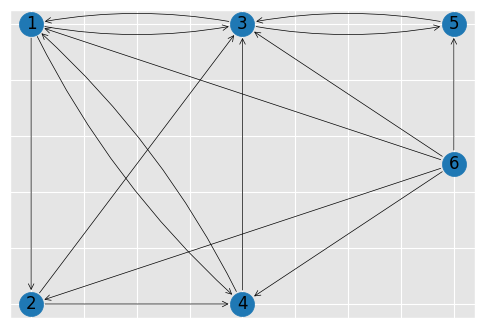

In [48]:
DG12 = DG11.copy()
DG12.add_node(6)
pos[6] = (2, 0.5)
DG12.add_edges_from([(6, i) for i in range(1, 6)])
draw_directed_edges(DG12, pos)

In [49]:
A = graph_to_matrix(DG12)
m = 0.15
S = np.ones((6, 6)) / 6
M12 = (1-m) * A + m * S

In [50]:
scoresA = page_rank(A)
scoresM = page_rank(M12)

print("Scores of A:")
for i in range(6):
    print(f"Score of x_{i+1} is {round(scoresA[i],3)}")
    
print()

print("Scores of M:")
for i in range(6):
    print(f"Score of x_{i+1} is {round(scoresM[i],3)}")

Scores of A:
Score of x_1 is 0.245
Score of x_2 is 0.082
Score of x_3 is 0.367
Score of x_4 is 0.122
Score of x_5 is 0.184
Score of x_6 is -0.0

Scores of M:
Score of x_1 is 0.231
Score of x_2 is 0.095
Score of x_3 is 0.34
Score of x_4 is 0.135
Score of x_5 is 0.174
Score of x_6 is 0.025


As we can see, by computing the scores using old formula, $x_6$ has a null importance score, since no incoming links exist. Instead, for the scores using $M$ we can see that even if $x_6$ has no incoming links (backlinks points to it), its importance score is not null and this is due to the fact that using the second formula, the calculation considers not just incoming links.

______

### Exercise 13:

**Q**: Construct a web consisting of two or more subwebs and determine the ranking
given by formula (3.1)

<Axes: >

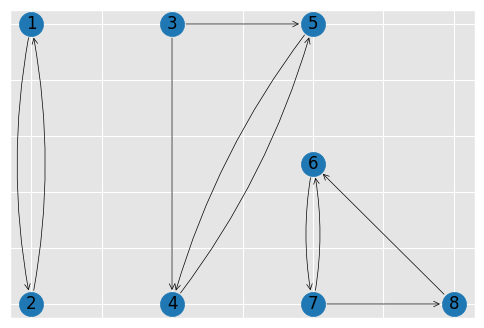

In [51]:
DG13 = nx.DiGraph()
DG13.add_nodes_from([1, 2, 3, 4, 5, 6, 7, 8])
DG13.add_edges_from([(1, 2), (2, 1), (3,4), (4,5), (3,5), (7,6), (6,7), (7,8), (5,4), (8,6)])
pos[7] = (2, 0)
pos[8] = (3, 0)
draw_directed_edges(DG13, pos)

In [52]:
A = graph_to_matrix(DG13)
m = 0.15
S = np.ones((8, 8)) / 8
M13 = (1-m) * A + m * S

scoresM = page_rank(M13)

print(f"Matrix A:\n{A}")

print()

print(f"Matrix M:\n{M13}")

print()

print(f"Is M column stochastic? {is_column_stochastic(M13)}")
# Initialize PageRank scores (x) to 1/n for each page
x = np.ones(8) / 8

print()

# Iteratively update the PageRank scores until convergence
for _ in range(100):  # Iterating 100 times for convergence
    x = np.dot(M13, x)

print("Scores of M:")
for i in range(8):
    print(f"Score of x_{i+1} is {round(x[i],3)}")    

Matrix A:
[[0.  1.  0.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.5 0.  1.  0.  0.  0. ]
 [0.  0.  0.5 1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.5 1. ]
 [0.  0.  0.  0.  0.  1.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.5 0. ]]

Matrix M:
[[0.01875 0.86875 0.01875 0.01875 0.01875 0.01875 0.01875 0.01875]
 [0.86875 0.01875 0.01875 0.01875 0.01875 0.01875 0.01875 0.01875]
 [0.01875 0.01875 0.01875 0.01875 0.01875 0.01875 0.01875 0.01875]
 [0.01875 0.01875 0.44375 0.01875 0.86875 0.01875 0.01875 0.01875]
 [0.01875 0.01875 0.44375 0.86875 0.01875 0.01875 0.01875 0.01875]
 [0.01875 0.01875 0.01875 0.01875 0.01875 0.01875 0.44375 0.86875]
 [0.01875 0.01875 0.01875 0.01875 0.01875 0.86875 0.01875 0.01875]
 [0.01875 0.01875 0.01875 0.01875 0.01875 0.01875 0.44375 0.01875]]

Is M column stochastic? True

Scores of M:
Score of x_1 is 0.125
Score of x_2 is 0.125
Score of x_3 is 0.019
Score of x_4 is 0.178
Score of x_5 is 0.178
Score o

______

### Exercise 14:

**Q**: For the web in Exercise 11, compute the values of $||M^{k}x_{0} - q ||_{1}$ and $\frac{||M^{k}x_{0} - q ||_{1}}{||M^{k-1}x_{0} - q ||_{1}}$ 
for $k$ = 1, 5, 10, 50, using an initial guess $x_{0}$ not too close to the actual eigenvector $q$ (so that you
can watch the convergence). Determine $c = max_{1 \leq j \leq n} |1 − 2 \times min_{1 \leq i \leq n} M_{ij}|$ and the absolute value
of the second largest eigenvalue of $M$.

In [53]:
M11

array([[0.03      , 0.03      , 0.455     , 0.455     , 0.03      ],
       [0.31333333, 0.03      , 0.03      , 0.03      , 0.03      ],
       [0.31333333, 0.455     , 0.03      , 0.455     , 0.88      ],
       [0.31333333, 0.455     , 0.03      , 0.03      , 0.03      ],
       [0.03      , 0.03      , 0.455     , 0.03      , 0.03      ]])

In [54]:
# Finding q
q = np.ones(5) / 5 #our initial guess
tol = 1e-6
for _ in range(100):  # Performing 100 iterations
    q = np.dot(M11, q)
    q /= np.sum(q)  # Normalize q to ensure its components sum to 1

print(f"q: {q}")

q: [0.23714058 0.09718983 0.34889409 0.13849551 0.17827999]


In [55]:
for k in [1,5,10,50]:
    print(f"-------------------- K = {k} --------------------")
    # Initialize a random guess
    x_0 = np.ones(5) / 5
    M_k = np.linalg.matrix_power(M11, k)
    the_norm = np.linalg.norm(M_k.dot(x_0) - q, ord=1)
    print(f"||M^{k} x_0 - q||_1: {the_norm}")
    
    M_k_1 =  np.linalg.matrix_power(M11, k-1) # for k=1, M^0 = I
    the_prev_norm = np.linalg.norm(M_k_1.dot(x_0) - q, ord=1)
    print(f"||M^{k-1} x_0 - q||_1: {the_prev_norm}")
    
    print(f"Ratio: {the_norm / the_prev_norm}")

-------------------- K = 1 --------------------
||M^1 x_0 - q||_1: 0.2218874662457157
||M^0 x_0 - q||_1: 0.3720693421776226
Ratio: 0.5963605196468689
-------------------- K = 5 --------------------
||M^5 x_0 - q||_1: 0.03408111322280395
||M^4 x_0 - q||_1: 0.05959000830497389
Ratio: 0.5719266399222712
-------------------- K = 10 --------------------
||M^10 x_0 - q||_1: 0.0027994812936856794
||M^9 x_0 - q||_1: 0.004556724748134983
Ratio: 0.6143626065698782
-------------------- K = 50 --------------------
||M^50 x_0 - q||_1: 7.878281360618189e-12
||M^49 x_0 - q||_1: 1.2887885203483052e-11
Ratio: 0.6112935703748371


Discussion about results:
- We see that the values of $||M^{k}x_{0} - q ||_{1}$ decrease as $k$ increases, indicating that the iteratively computed scores are converging towards the steady-scores represented by $q$.
- The ratio $\frac{||M^{k}x_{0} - q ||_{1}}{||M^{k-1}x_{0} - q ||_{1}}$ also tends to converge as $k$ increases.

In [56]:
# Calculating c

min_per_column = np.min(M11, axis=0)
exp_per_column = np.abs(1 - 2*min_per_column)
c = np.max(exp_per_column)

print(f"c: {c}")

c: 0.94


In [57]:
eigenvalues, eigenvectors = la.eig(M11)
rho = np.argmax(np.abs(eigenvalues))
eigenvalues[rho] = 0

print(f"The absolute value of the second largest eigenvalue of M is: {np.max(np.abs(eigenvalues))}")

The absolute value of the second largest eigenvalue of M is: 0.6112685063651938


The ratio calculated above for $k$=50 is very close to the absolute value of the second largest eigenvalue of $M$.

______

### Exercise 15:

**Q**: To see why the second largest eigenvalue plays a role in bounding $\frac{||M^{k}x_{0} - q ||_{1}}{||M^{k-1}x_{0} - q ||_{1}}$,
consider an $n \times n$ positive column-stochastic matrix $M$ that is diagonalizable. Let $x_{0}$ be any vector
with non-negative components that sum to one. Since $M$ is diagonalizable, we can create a basis
of eigenvectors {$q, v_{1}, \dots , v_{n−1}$}, where $q$ is the steady state vector, and then write $x_{0} = aq +
\sum_{k=1}^{n-1} b_{k}v_{k}$.
Determine $M^{k}x_{0}$, and then show that $a = 1$ and the sum of the components of each
$v_{k}$ must equal 0. Next apply *Proposition 4* to prove that, except for the non-repeated eigenvalue
$\lambda$ = 1, the other eigenvalues are all strictly less than one in absolute value. Use this to evaluate
$ \lim_{k\to\infty}  \frac{||M^{k}x_{0} - q ||_{1}}{||M^{k-1}x_{0} - q ||_{1}} $

**ANSWER**

1. Since $M$ is diagonalizable, it can be respresented as $M = PDP^{-1}$ where $D$ is a diagonal matrix of eigenvalues, and $P$ is the matrix of eigenvectors.
2. $M^{k}x_{0}$ can be expressed in terms of the power of the eigenvalues and the corresponding eigenvectors.
3. When $M$ is applied $k$ times to $x_{0}$, each eigenvector is scaled by its corresponding eigenvalue raised to the power of $k$. For the principal eigenvector $q$ corresponding to the eigenvalue 1, $M^{k}q = q$. For other eigenvectors $v_{k}$, $M^{k}v_{k}$ will involve scaling by their respective eigenvalues to the power of $k$.
4. Therefore, $M^{k}x_{0} = aM^{k}q + \sum_{k=1}^{n-1} b_{k}M^{k}v_{k} = aq + \sum_{k=1}^{n-1} b_{k} \lambda_{k}^{k} v_{k}$ are the eigenvalues corresponding to $v_k$.

Now we have to prove that $a$ = 1 and the sum of the $v_k$ component have to be equal to 0.

1. As $k$ approaches infinity, the terms $\lambda_{k}^{k}$ for $\lambda_{k}$ less than 1 in absolute values will diminish to 0, leaving only the $aq$ term in the limit.
2. Since $x_0$ is a vector where the sum of its components equal to 1, and same for $q$ as well, the expression $M^{k}x_{0}$ requires $a=1$. Otherwise the limiting vector would not sum to 1.
3. Eigenvectors corresponding to different eigenvalues of a diagonalizable matrix are orthogonal. For the principal eigenvector $q$, which sums to 1, orthogonality with $v_{k}$ implies that the sum of the components of $v_{k}$ must be 0.

Proposition 4: It suggests that for a positive, column-stochastic matrix $M$, except for the principal eigenvalue 1, all other eigenvalues must have an absolute value strictly less than 1.

This is because the eigenvalue 1 corresponds to the steady state, and all other directions (eigenvectors) must converge to this state, implying their corresponding eigenvalues must be less than 1 in absolute value.

**Evaluating the Limit**

We have $M^{k}x_{0} = aq + \sum_{k=1}^{n-1} b_{k} \lambda_{k}^{k} v_{k}$ where $\lambda_{k}$ are the eigenvalues to $v_{k}$ and they are less than 1 for $k \neq 1$.

The terms $\lambda_{k}^{k} v_{k}$ vanishes as $k$ go to infinity because the absolute values of the lambdas (magnitude of eigenvalues) is strictly less than 1.

Hence, $M^{k}x_{0}$ converges to $aq$ and since $a=1$ it converges to $q$.

Now. both $||M^{k}x_{0} - q ||_{1}$ and $||M^{k-1}x_{0} - q ||_{1}$ tends to 0 but the former approaches 0 faster due to the higher powers of $\lambda_{k}$.

Therefore, 

$$ \lim_{k\to\infty}  \frac{||M^{k}x_{0} - q ||_{1}}{||M^{k-1}x_{0} - q ||_{1}} = 0 $$
_____

### Exercise 16:

**Q**: Consider the link matrix
$$
\begin{bmatrix}
0 & 1/2 & 1/2\\
0 & 0 & 1/2\\
1 & 1/2 & 0\\
\end{bmatrix}
$$
Show that $M = (1-m)A + mS$ (all $S_{ij}= 1/3$ ) is not diagonalizable for $0 \leq m \lt 1$.

In [58]:
# Given link matrix A and matrix S
A = np.array([
    [0, 0.5, 0.5],
    [0, 0, 0.5],
    [1, 0.5, 0]
])

S = np.ones((3, 3)) / 3

# Construct M for a general m in the range 0 <= m < 1
# We use a symbolic m to represent the general case
m = symbols('m')
M = (1 - m) * Matrix(A) + m * Matrix(S)

M

Matrix([
[      0.333333333333333*m, 0.5 - 0.166666666666667*m, 0.5 - 0.166666666666667*m],
[      0.333333333333333*m,       0.333333333333333*m, 0.5 - 0.166666666666667*m],
[1.0 - 0.666666666666667*m, 0.5 - 0.166666666666667*m,       0.333333333333333*m]])

In [59]:
# return a dictoinary of eigenvalues and their algebraic multiplicities (eigenvalues are in terms of m)
eigenvalues = M.eigenvals()
eigenvalues

{0.333333333333333*m - 0.176377894663133*(0.25*m**2 - 1.5*m + 2.25)/(-0.148148148148148*m**3 - 0.5*m**2 + 0.666666666666667*m*(0.25*m**2 + 0.5*m - 0.75) + m + sqrt(-0.25*(0.111111111111111*m**2 - 0.666666666666667*m + 1)**3 + (-0.148148148148148*m**3 - 0.5*m**2 + 0.666666666666667*m*(0.25*m**2 + 0.5*m - 0.75) + m - 0.5)**2) - 0.5)**(1/3) - 0.629960524947436*(-0.148148148148148*m**3 - 0.5*m**2 + 0.666666666666667*m*(0.25*m**2 + 0.5*m - 0.75) + m + sqrt(-0.25*(0.111111111111111*m**2 - 0.666666666666667*m + 1)**3 + (-0.148148148148148*m**3 - 0.5*m**2 + 0.666666666666667*m*(0.25*m**2 + 0.5*m - 0.75) + m - 0.5)**2) - 0.5)**(1/3): 1,
 0.333333333333333*m - 0.176377894663133*(0.25*m**2 - 1.5*m + 2.25)/((-1/2 + sqrt(3)*I/2)*(-0.148148148148148*m**3 - 0.5*m**2 + 0.666666666666667*m*(0.25*m**2 + 0.5*m - 0.75) + m + sqrt(-0.25*(0.111111111111111*m**2 - 0.666666666666667*m + 1)**3 + (-0.148148148148148*m**3 - 0.5*m**2 + 0.666666666666667*m*(0.25*m**2 + 0.5*m - 0.75) + m - 0.5)**2) - 0.5)**(1/3)) -

In [60]:
# return a list of tuples (eigenvalue, algebraic multiplicity, eigenvectors)
eigenvectors = M.eigenvects()
eigenvectors

[(1.00000000000000,
  1,
  [Matrix([
   [(m - 3.0)/(2.0*m - 4.0)],
   [           -1/(m - 2.0)],
   [                    1.0]])]),
 (0.5*m - 0.5,
  2,
  [Matrix([
   [   0],
   [-1.0],
   [ 1.0]])])]

If, for any eigenvalue, the geometric multiplicity is less than the algebraic multiplicity, $M$ is not diagonalizable.

Here, the algebraic multiplicity of each eigenvalues is 1, while one of them has a GEOMETRIC multiplicty of 2.

Therefore, $M$ for any $m$ is not diagonalizable

In [61]:
# Additional Verification by throwing an error
try:
    P, D = M.diagonalize()
except Exception as e:
    print(f"ERROR: {e}")

ERROR: Matrix is not diagonalizable


______
### Exercise 17:

**Q**: How should the value of $m$ be chosen? How does this choice affect the rankings and the computation time?

**ANSWER**

*How to choose $m$?*
1. Common Practice: 
- $m$ is common as 0.15, this is a conventional choice based on empirical studies, by the creators of the Google's PageRank Algorithm.
2. Rational:
- The idea is to balance the influence of the structure of the web (captured by $A$) and a random surfer model (captured by $S$). A value of $m$ closer to 1 puts more weight on the link structure, while a lower value increases the influence of the random surfer aspect.

*Effects of Rankings*
- A higher $m$ can lead to well-linked pages (like popular websites) having significantly higher PageRank scores due to their many inbound links.
- A lower $m$ increases the teleportation effect, which can help distribute PageRank more evenly and give more visibility to lesser-linked pages.

*Effects of Computation Time*
- The value of $m$ can affect the convergence rate of the PageRank algorithm. A higher $m$ might lead to slower convergence, as the algorithm relies more on the complex structure of the web graph.
- A carefully chosen $m$ can help in achieving a balance between fast convergence and the stability of the results.

_____